# Creating your own dataset  - off-ADHD and CTRL

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In [1]:
from fastai.vision import *

In [2]:
from random import randint

In [3]:
path = Path('GASF')
#dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

get_transforms()

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=[[],[]], size=224).normalize(imagenet_stats)

In [4]:
def get_float_labels_combine(y):
    label = ((y.parts[-1].split('_')[-1]).split('.')[0])
    if label == 'Ctrl' or label == 'on-ADHD':
        return 'Ctrlormed'
    else:
        return label

In [5]:
def get_float_labels(y):
    label = ((y.parts[-1].split('_')[-1]).split('.')[0])
    return label

In [6]:
np.random.seed(42)
tfms = [[],[]]
fnames = get_image_files(path)

In [7]:
fnames_nomeds = []
for onefile in fnames:
    if "on-ADHD" not in onefile.parts[-1]:
        fnames_nomeds.append(onefile)
fnames_nomeds


[PosixPath('GASF/interpol_sliced100_48_79_Ctrl.jpg'),
 PosixPath('GASF/interpol_sliced100_12_14_off-ADHD.jpg'),
 PosixPath('GASF/interpol_sliced100_57_65_Ctrl.jpg'),
 PosixPath('GASF/interpol_sliced100_65_99_Ctrl.jpg'),
 PosixPath('GASF/interpol_sliced100_58_136_Ctrl.jpg'),
 PosixPath('GASF/interpol_sliced100_23_86_off-ADHD.jpg'),
 PosixPath('GASF/interpol_sliced100_63_59_Ctrl.jpg'),
 PosixPath('GASF/interpol_sliced100_7_99_off-ADHD.jpg'),
 PosixPath('GASF/interpol_sliced100_51_98_Ctrl.jpg'),
 PosixPath('GASF/interpol_sliced100_17_139_off-ADHD.jpg'),
 PosixPath('GASF/interpol_sliced100_3_6_off-ADHD.jpg'),
 PosixPath('GASF/interpol_sliced100_4_119_off-ADHD.jpg'),
 PosixPath('GASF/interpol_sliced100_25_64_off-ADHD.jpg'),
 PosixPath('GASF/interpol_sliced100_22_124_off-ADHD.jpg'),
 PosixPath('GASF/interpol_sliced100_5_137_off-ADHD.jpg'),
 PosixPath('GASF/interpol_sliced100_65_54_Ctrl.jpg'),
 PosixPath('GASF/interpol_sliced100_63_159_Ctrl.jpg'),
 PosixPath('GASF/interpol_sliced100_7_103_off

In [8]:
def get_subject_label(y):
    label = ((y.parts[-1].split('_')[-3]).split('.')[0])
    return label

In [9]:
def pickvalidsubjects():
    while True:
        ADHD1 = randint(1,28)
        ADHD2 = randint(1,28)
        ADHD3 = randint(1,28)
        if ADHD1 != ADHD2 and ADHD2!= ADHD3 and ADHD1 != ADHD3:
            break
    while True:
        CTRL1 = randint(46,67)
        CTRL2 = randint(46,67)
        CTRL3 = randint(46,67)
        if CTRL1 != CTRL2 and CTRL2!= CTRL3 and CTRL1 != CTRL3:
            break
    
    
    return [ADHD1,ADHD2,ADHD3,CTRL1,CTRL2,CTRL3]
    

In [11]:
validsubjects = [23, 13, 24, 48, 59, 55]

In [12]:
#validsubjects = pickvalidsubjects()
print(validsubjects)
def generatevalidfilenames(validsubjects):
    validfilenames_list = []
    for fname in fnames:
        if int(get_subject_label(fname)) in validsubjects:
            stem = fname.name
            validfilenames_list.append(stem)
    return validfilenames_list
            
    

[23, 13, 24, 48, 59, 55]


In [13]:
valid_names_mygen = generatevalidfilenames(validsubjects)
valid_names_mygen_IL = ItemList(valid_names_mygen)

In [14]:
valid_names_mygen

['interpol_sliced100_48_79_Ctrl.jpg',
 'interpol_sliced100_23_86_off-ADHD.jpg',
 'interpol_sliced100_13_91_off-ADHD.jpg',
 'interpol_sliced100_24_70_off-ADHD.jpg',
 'interpol_sliced100_13_159_off-ADHD.jpg',
 'interpol_sliced100_23_76_off-ADHD.jpg',
 'interpol_sliced100_24_78_off-ADHD.jpg',
 'interpol_sliced100_59_36_Ctrl.jpg',
 'interpol_sliced100_13_88_off-ADHD.jpg',
 'interpol_sliced100_59_149_Ctrl.jpg',
 'interpol_sliced100_24_47_off-ADHD.jpg',
 'interpol_sliced100_48_14_Ctrl.jpg',
 'interpol_sliced100_59_52_Ctrl.jpg',
 'interpol_sliced100_55_43_Ctrl.jpg',
 'interpol_sliced100_23_157_off-ADHD.jpg',
 'interpol_sliced100_55_156_Ctrl.jpg',
 'interpol_sliced100_24_150_off-ADHD.jpg',
 'interpol_sliced100_24_48_off-ADHD.jpg',
 'interpol_sliced100_59_83_Ctrl.jpg',
 'interpol_sliced100_24_105_off-ADHD.jpg',
 'interpol_sliced100_55_52_Ctrl.jpg',
 'interpol_sliced100_55_62_Ctrl.jpg',
 'interpol_sliced100_23_55_off-ADHD.jpg',
 'interpol_sliced100_24_69_off-ADHD.jpg',
 'interpol_sliced100_48_58

In [15]:
data = (ImageList(fnames_nomeds)
        .split_by_files(valid_names=valid_names_mygen_IL)
        .label_from_func(get_float_labels)
        .transform(tfms, size=224)
        .databunch())

In [95]:
data.classes

['Ctrl', 'off-ADHD']

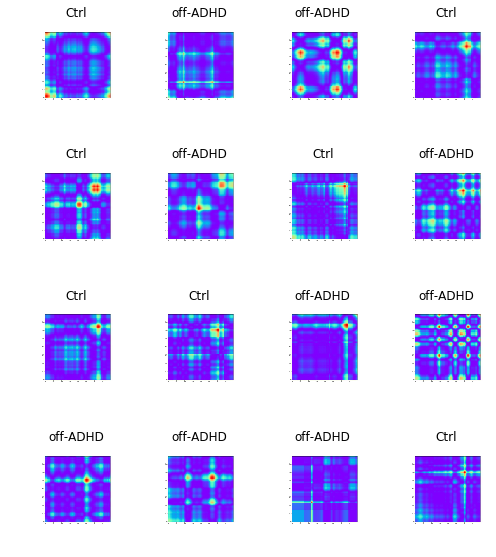

In [96]:
data.show_batch(rows=4, figsize=(7,8))

In [97]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Ctrl', 'off-ADHD'], 2, 5131, 742)

## Train model

In [16]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [99]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.865903,0.723460,0.373315,01:33
1,0.675785,0.654045,0.349057,01:31
2,0.577983,0.651980,0.363881,01:31
3,0.486294,0.624585,0.342318,01:31


In [100]:
learn.unfreeze()

In [101]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


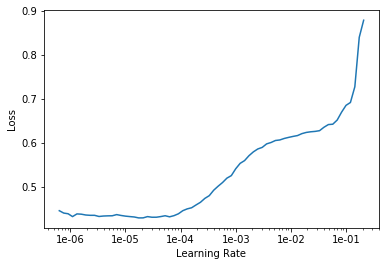

In [102]:
learn.recorder.plot()

In [103]:
learn.fit_one_cycle(2, max_lr=2e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.439042,0.623376,0.346361,01:59
1,0.411261,0.626636,0.340970,01:59


In [104]:
learn.save('Repurposed_Classifier_CNN_pupil_ADHD_2class_ctrl_offADHD_validspecific_23_13_24_48_59_55')

## Interpretation

In [17]:
learn.load('Repurposed_Classifier_CNN_pupil_ADHD_2class_ctrl_offADHD_validspecific_23_13_24_48_59_55');

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

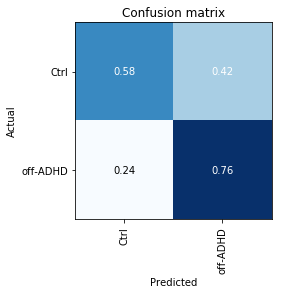

In [19]:
interp.plot_confusion_matrix(figsize=(4,4),normalize=True)

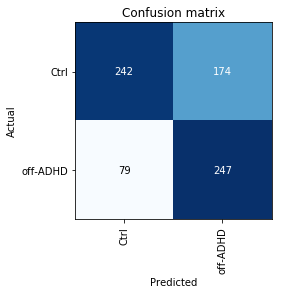

In [22]:
interp.plot_confusion_matrix(figsize=(4,4),normalize=False)

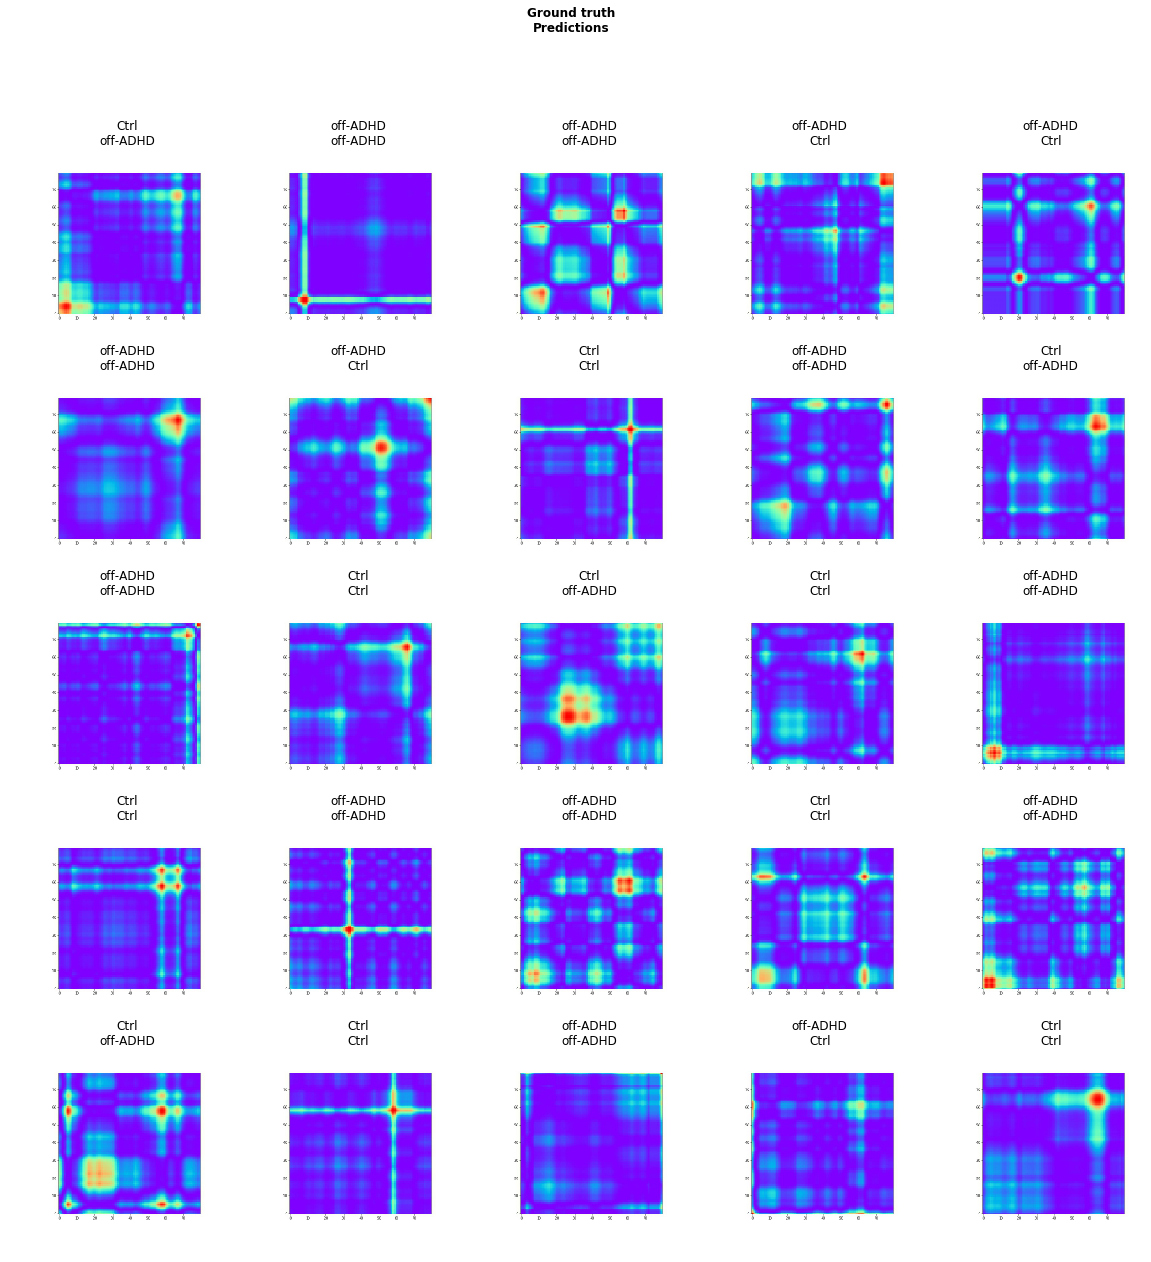

In [21]:
learn.show_results()

In [ ]:
#interp.plot_top_losses(9,heatmap=False)

In [ ]:
interp.plot_top_losses(9,heatmap=True)

In [ ]:
from IPython.display import Image

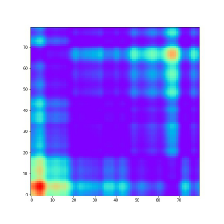

In [31]:
img = learn.data.train_ds[0][0]
img
#learn.predict(img)

In [32]:
learn.predict(img)

(Category Ctrl, tensor(0), tensor([0.6588, 0.3412]))

In [107]:
validsubjects

[23, 13, 24, 48, 59, 55]